<a href="https://colab.research.google.com/github/humbertocg/machinelearningExample/blob/main/mi_primer_red_neuronal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

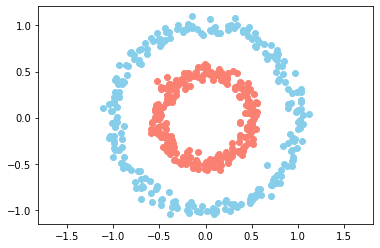

In [27]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

n = 500 # cantidad de datos
p = 2 #caracteristicas

#Crear dataset X entradas, salidas
X, Y = make_circles(n_samples=n, factor=0.5, noise= 0.05)

Y = Y[:, np.newaxis]

#print(Y)
plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1], c='skyblue')
plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1], c='salmon')
plt.axis("equal")
plt.show()

In [26]:
Y.shape

(500,)

In [4]:
# capa de la red
class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur)      * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1

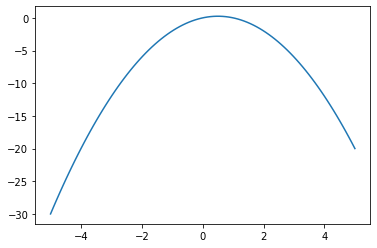

In [5]:
# funciones de activacion. seleccionado la sigmoide y su derivada
sigm = (lambda x: 1/(1+ np.e**(-x)),
        lambda x: x*(1-x))
# funcion de relu
relu = lambda x : np.maximum(0,x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, sigm[1](_x))

In [6]:
# numero de capas:
def create_nn(topology, act_f):
  nn = [] # neural network
  for l, layer in enumerate(topology[:-1]):
    nn.append(neural_layer(topology[l],topology[l+1], act_f))
  return nn



In [43]:
#training de la red neuronal
topology = [p, 4, 8, 1]
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr : np.mean((Yp - Yr)**2), #error cuadratico medio
          lambda Yp, Yr : (Yp - Yr))             # derivada del error cuadratico medio

def train(neural_net, X, Y, l2_cost, lr=0.5, train = True):  # learning rate
  out =[(None,X)]
  # forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ neural_net[l].W + neural_net[l].b #suma ponderada.   out[-1] es el ultimo registro del arreglo
    a = neural_net[l].act_f[0](z) #activacion
    out.append((z, a))

  print(l2_cost[0](out[-1][1],Y))

  if train:
    # Backward pass
    deltas = []
    for l in reversed(range(0, len(neural_net))):

      z= out[l+1][0]
      a= out[l+1][1]

      print(a.shape)

      
      if l == len(neural_net)- 1:
        # calcular delta ultima capa
        deltas.insert(0, l2_cost[1](a, Y)* neural_net[l].act_f[1](a)) # calcular delta 0
      else:
        # calcular delta respecto a capa previa
        deltas.insert(0, deltas[0] @ _w.T  * neural_net[l].act_f[1](a)) # calcular delta 0

      _w = neural_net[l].W

      # Gradient descent derivadas parciales
      neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims=True) * lr
      neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr

    return out[-1][1]


train(neural_net, X, Y, l2_cost, 0.5)
print("")

0.26829619583306685
(500, 1)
(500, 8)
(500, 4)



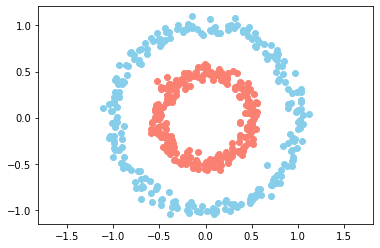

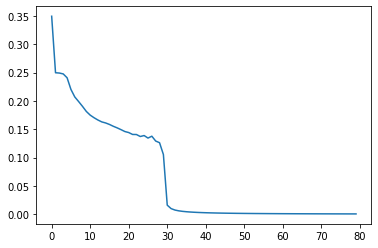

0.0006530542645976824
(500, 1)
(500, 8)
(500, 4)
0.0006525344585626791
(500, 1)
(500, 8)
(500, 4)
0.0006520154641531727
(500, 1)
(500, 8)
(500, 4)
0.000651497279479214
(500, 1)
(500, 8)
(500, 4)
0.0006509799026566999
(500, 1)
(500, 8)
(500, 4)
0.0006504633318073547
(500, 1)
(500, 8)
(500, 4)
0.0006499475650587039
(500, 1)
(500, 8)
(500, 4)
0.0006494326005440554
(500, 1)
(500, 8)
(500, 4)
0.0006489184364024734
(500, 1)
(500, 8)
(500, 4)
0.0006484050707787604
(500, 1)
(500, 8)
(500, 4)
0.0006478925018234301
(500, 1)
(500, 8)
(500, 4)
0.0006473807276926923
(500, 1)
(500, 8)
(500, 4)
0.0006468697465484235
(500, 1)
(500, 8)
(500, 4)
0.0006463595565581512
(500, 1)
(500, 8)
(500, 4)
0.0006458501558950295
(500, 1)
(500, 8)
(500, 4)
0.0006453415427378161
(500, 1)
(500, 8)
(500, 4)
0.0006448337152708552
(500, 1)
(500, 8)
(500, 4)
0.0006443266716840521
(500, 1)
(500, 8)
(500, 4)
0.0006438204101728553
(500, 1)
(500, 8)
(500, 4)
0.0006433149289382311
(500, 1)
(500, 8)
(500, 4)
0.0006428102261866459

In [46]:
import time
from IPython.display import clear_output

neural_n = create_nn(topology, sigm)

loss = []

for i in range(2000):
  #Entrenar red
  pY = train(neural_n, X, Y, l2_cost, lr=0.05)

  if i% 25 ==0:
    loss.append(l2_cost[0](pY, Y))

    res =50# malla de 50 por 50

    _x0 = np.linspace(-1.5, 1.5 , res)
    _x1 = np.linspace(-1.5, 1.5 , res)

    _Y = np.zeros((res,res))

   # for i0, x0 in enumerate(_x0):
   #   for i1, x1 in enumerate(_x1):
   #     _Y[i0, i1] = train(neural_n, np.array([[x0, x1]]), Y, l2_cost, train= False)[0][0]

   # plt.pcolormesh(_x0, _x1, _Y, cmap= "coolwarm")
   # plt.axis("equal")

    plt.scatter(X[Y[:,0] == 0,0],X[Y[:,0] == 0,1], c='skyblue')
    plt.scatter(X[Y[:,0] == 1,0],X[Y[:,0] == 1,1], c='salmon')

    clear_output(wait= True)
    plt.axis("equal")
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()
    time.sleep(0.5)